# 2018, ANN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./final_input/rt.csv")

In [4]:
df = data

In [5]:
Y = df["temp"]
data_Y = np.array(Y.tolist())
data_Y

array([27.613 , 23.1775, 19.889 , ..., 25.954 , 22.4645, 20.319 ])

In [6]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

/Users/carnivalbug/Library/Python/2.7/lib/python/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
data_X = df.values

In [8]:
data_Y

array([27.613 , 23.1775, 19.889 , ..., 25.954 , 22.4645, 20.319 ])

In [9]:
data_X

array([[ 4.4761e+01,  1.0310e+00,  0.0000e+00, ...,  9.0500e+02,
         2.0000e+00,  2.0180e+03],
       [ 7.6410e+01,  5.0000e-01,  1.1200e-01, ...,  1.2650e+03,
         3.0000e+00,  2.0180e+03],
       [ 8.2507e+01,  1.4220e+01, -1.8800e-01, ...,  1.2150e+03,
         0.0000e+00,  2.0180e+03],
       ...,
       [ 4.8914e+01,  4.5600e-01, -9.7000e-02, ...,  1.0450e+03,
         9.2000e+01,  2.0180e+03],
       [ 7.3932e+01,  2.3230e+00,  3.9000e-02, ...,  3.2500e+02,
         9.0000e+01,  2.0180e+03],
       [ 1.0000e+02,  6.5400e-01,  1.3200e-01, ...,  8.5500e+02,
         9.4000e+01,  2.0180e+03]])

In [10]:
data_X.shape

(770290, 16)

## Normalization

In [11]:
def column(matrix, i):
    return [row[i] for row in matrix]
def norm(lst):
    min_v = min(lst)
    max_v = max(lst)
    norm_lst = [(i-min_v)/(max_v-min_v) for i in lst]
    return norm_lst

In [12]:
curr = column(data_X, 0)
rt = np.array([norm(curr)])
for i in range(1, 15):
    if (i!=3):
        curr = column(data_X, i)
        rt = np.concatenate((rt, np.array([norm(curr)])))

In [13]:
final_rt = rt.T
final_rt.shape

(770290, 14)

In [14]:
data_X = final_rt

In [15]:
data_X.shape

(770290, 14)

In [16]:
data_Y.shape

(770290,)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)
y_train  = y_train.astype(float)
y_test  = y_test.astype(float)
batch_size =len(X_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

((616232, 14), (616232,), (154058, 14), (154058,))


In [18]:
data_Y

array([27.613 , 23.1775, 19.889 , ..., 25.954 , 22.4645, 20.319 ])

In [19]:
data_X[0]

array([0.66410697, 0.01444402, 0.53919185, 0.14865293, 0.21018944,
       0.22850487, 0.28961718, 0.29813809, 0.34211642, 0.37329904,
       0.36700773, 0.60230189, 0.62937063, 0.0212766 ])

## ANN with MSE

In [20]:
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(64, activation = 'tanh', input_dim = 14)) 
classifier.add(Dropout(0.2))
classifier.add(Dense(32, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(8, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error')


In [21]:
history_mse = classifier.fit(data_X, data_Y, epochs = 100, verbose = 0, validation_split = 0.2)

In [22]:
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

154058/154058 [==============================] - 3s 19us/sample - loss: 12.7163
('Test Score:', 12.716256894682619)
616232/616232 [==============================] - 13s 21us/sample - loss: 12.8947
('Train Score:', 12.894747950484772)


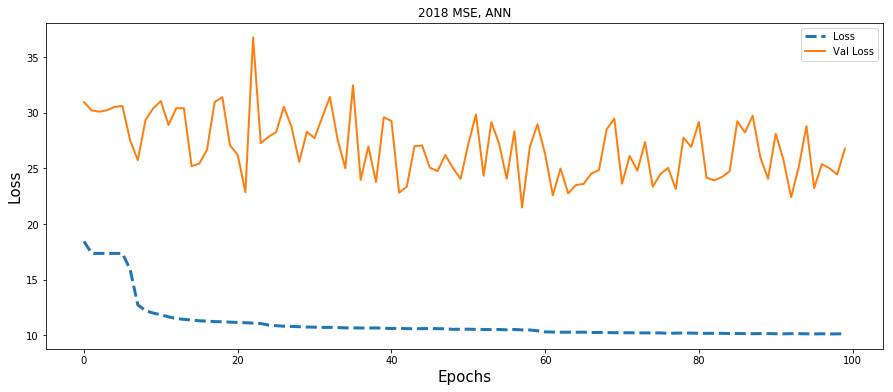

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('2018 MSE, ANN')
plt.legend()